# Viewpoint Assessment  
# Author: Graham Swain

## Question 1
Please reference the below tables, where entries shown are purely examples of what could be in these tables.

The first table, <span style="color:#c7254e">Students</span>, has the following columns:
- <span style="color:#c7254e">id</span>, a unique integer for each student
- <span style="color:#c7254e">name</span>, a string containing the student's name, where the first name is capitalized.

The second table, <span style="color:#c7254e">Assignments</span>, has the following columns:
- <span style="color:#c7254e">id</span>, a unique integer for each assignment a student has taken
- <span style="color:#c7254e">student_id</span>, a foreign key referring to the student table
- <span style="color:#c7254e">grade</span>, an integer giving a student's grade on an assignment

### **A.** Write a SQL query that returns the id, name, and maximum assignment grade of the student(s) with the highest **average** grade across all assignments.

```
WITH t1 AS (SELECT avg(grade) as mean
            FROM Assignments
            GROUP BY student_id),
     t2 AS (SELECT Students.id, Students.name, max(grade) as high, avg(grade) as mean
            FROM Students JOIN Assignments on Students.id = Assignments.student_id
            GROUP BY Students.id)
SELECT DISTINCT id, name, high
FROM t1, t2
WHERE t2.mean = (SELECT max(mean)
                 FROM t1);
```
### **B.** Assume that assignments that are not submitted are simply not entered into the <span style="color:#c7254e">Assignments</span> table. Write a SQL query that returns the names of the students that have not submitted an assignment.

```
WITH t1 AS (SELECT student_id as id, count(id) as cnt
            FROM Assignments
            GROUP BY student_id)
SELECT max(cnt)
FROM t1;
```

Now assume both tables are instead given to you as pandas DataFrame objects called <span style="color:#c7254e">students_df</span> and <span style="color:#c7254e">assignments_df</span>.

### **C.** Write a python function, utilizing pandas, that takes in <span style="color:#c7254e">student_df</span> and returns a new DataFrame of the same <span style="color:#c7254e">id</span>'s and <span style="color:#c7254e">name</span>'s, but where now each <span style="color:#c7254e">name</span> containing the letter “e” is uppercased, and lowercased otherwise (e.g. “Edward” → “EDWARD”, “Bob” → “bob”).

This block imports panda and creates a small DataFrame for testing **C** and **D**.

In [1]:
import pandas as pd

students_df = pd.DataFrame(
    [[1, 'Edward'],
     [2, 'Bob'],
     [3, 'Zec'],
     [4, 'Phil'],
     [5, 'Aarone']],
    index = [1,2,3,4,5],
    columns = ['id', 'name']
    )

assignments_df = pd.DataFrame(
    [[1, 1, 100],
     [2, 1, 90],
     [3, 1, 95],
     [4, 2, 79],
     [5, 2, 2],
     [6, 3, 84],
     [7, 3, 87],
     [8, 3, 79],
     [9, 4, 95],
     [10, 4, 95],
     [11, 4, 95],
     [12, 5, 10],
     [13, 5, 87],
     [14, 5, 34]],
    index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    columns = ['id', 'student_id', 'grade'])

In [2]:
def check_e(df):
    """
    Takes in a dataframe of students and puts any names with an 'e' to uppercase
    and any name without an 'e' to lowercase.

    Parameters
    ----------
    df : DataFrame
        Pandas DataFrame holding students' id and name.

    Returns
    -------
    rtn : DataFrame
        Updated DataFrame with names with an 'e' in uppercase and names without
        an 'e' in lowercase.

    """
    rtn = df.copy()
    # if it contains an 'e' call upper(), if not call lower(). case insensitive
    rtn.loc[rtn.name.str.lower().str.contains('e'), 'name'] = rtn.name.str.upper()
    rtn.loc[~ rtn.name.str.lower().str.contains('e'), 'name'] = rtn.name.str.lower()
    return rtn

**Students before:**

In [3]:
students_df

,id,name
1,1,Edward
2,2,Bob
3,3,Zec
4,4,Phil
5,5,Aarone


In [4]:
students_lower_df = check_e(students_df)

**Student's after:**

In [5]:
students_lower_df

,id,name
1,1,EDWARD
2,2,bob
3,3,ZEC
4,4,phil
5,5,AARONE


### **D.** Now write a python function that takes in the output DataFrame of the function written above, along with <span style="color:#c7254e">assignments_df</span>, and returns a data frame that summarizes the average grade of uppercase named students and lowercase named students.

In [6]:
def case_average(students_df, assignments_df):
    """
    Takes in students_df after running check_e() and assignments_df. Averages
    grades of students with uppercase and lowercase names.

    Parameters
    ----------
    students_df : DataFrame
        Holds information of students with all names either all uppercase or all
        lowercase based on if they contain an 'e'.
    assignments_df : DataFrame
        Holds information of assignments turned in by students.

    Returns
    -------
    Average of grades with students grouped by the case of their name.

    """
    # combines the DataFrames using students.id and assignments.student_id
    combined_df = students_df.merge(assignments_df, left_on='id', right_on='student_id')
    # removes unnecessary columns
    combined_df.drop(['id_x', 'id_y', 'student_id'], inplace = True, axis = 1)
    
    # averages grades based off the case of students name
    upper_avg = combined_df[combined_df.name.str.isupper()].mean()
    lower_avg = combined_df[combined_df.name.str.islower()].mean()
    
    # creates new dataframe holding the averages
    rtn_df = pd.DataFrame({'Uppercase': upper_avg, 'Lowercase': lower_avg})
    rtn_df.rename(index = {'grade': 'average'}, inplace = True)
    return rtn_df

**Finding averages of uppercase and lowercase Students:**

In [7]:
averages = case_average(students_lower_df, assignments_df)

In [8]:
averages

,Uppercase,Lowercase
average,74.0,73.2


## Question 2
Consider the data set below.  Write some python code that illustrates some common feature engineering and/or data preparation tasks.  

https://raw.githubusercontent.com/ireapps/white-house-salaries-2017/master/white_house_2017_salaries.csv

Importing data:

In [9]:
wh_df = pd.read_csv('https://raw.githubusercontent.com/ireapps/white-house-salaries-2017/master/white_house_2017_salaries.csv')

We will run a few commands to see the basics of the dataset.

In [10]:
wh_df.head()

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE
0,"Alexander, Monica K.",Employee,"$56,000.00",Per Annum,EXECUTIVE ASSISTANT
1,"Ambrosini, Michael J.",Employee,"$95,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...
2,"Amin, Stacy C.",Employee,"$140,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...
3,"Andersen, Whitney N.",Employee,"$94,000.00",Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...
4,"Anderson, Alexander J.",Employee,"$77,000.00",Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT


In [11]:
wh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   NAME            377 non-null    object
 1   STATUS          377 non-null    object
 2   SALARY          377 non-null    object
 3   PAY BASIS       377 non-null    object
 4   POSITION TITLE  377 non-null    object
dtypes: object(5)
memory usage: 14.9+ KB


In [12]:
wh_df.describe()

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE
count,377,377,377,377,377
unique,377,3,74,1,215
top,"Walters, Lindsay E.",Employee,"$115,000.00",Per Annum,EXECUTIVE ASSISTANT
freq,1,358,46,377,20


- head() shows the first four rows of the dataset so we can see what it looks like.
- info() shows each column as well as its type and amount of non-null entries.
- describe() shows how many rows there are and how many unique values there are in each column.

Between info() and describe() we see that there are 377 rows and each column has 377 non-null values.

We also see that SALARY is stored as an object. If we want to perform any analysis on it, we will need it as a numeric value. In this case, storing it as an int would likely work as it seems like all of the salaries are whole numbers, but I am going to convert it to a float just in case there are any with decimal values.

In [13]:
wh_df.SALARY = wh_df.SALARY.astype(str).str.replace(',', '').str.strip('$').astype(float)

In [14]:
wh_df.head()

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE
0,"Alexander, Monica K.",Employee,56000.0,Per Annum,EXECUTIVE ASSISTANT
1,"Ambrosini, Michael J.",Employee,95000.0,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...
2,"Amin, Stacy C.",Employee,140000.0,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...
3,"Andersen, Whitney N.",Employee,94000.0,Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...
4,"Anderson, Alexander J.",Employee,77000.0,Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT


Another problem is 'PAY BASIS' and 'POSITION TITLE' contain a whitespace in the name, which I will replace with an underscore.

I am also going to make them lowercase to make it a little easier to work with.

In [15]:
wh_df.columns = wh_df.columns.str.replace("\s", "_", regex = True).str.lower()

In [16]:
wh_df.columns

Index(['name', 'status', 'salary', 'pay_basis', 'position_title'], dtype='object')

Now we will look at the unique values in Status and Position Title to see if there is anything that could be used for models.

In [17]:
wh_df.status.unique()

array(['Employee', 'Detailee', 'Employee       '], dtype=object)

Status only has Employees and Detailees, we just need to strip it real quick to fix the 'Employee       '.

In [18]:
wh_df.status = wh_df.status.str.strip()

In [19]:
wh_df.status.unique()

array(['Employee', 'Detailee'], dtype=object)

We do not need to do anything further to Status as it only contains two unique values, which is pretty easy to work with.

Position Title on the other hand has 215 unique values. A lot of people hold multiple titles, like Michael J. Ambrosini (second entry), who is the *SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTOR OF THE OFFICE OF THE CHIEF OF STAFF*.
It is hard to work with this many unique values, so it would be beneficial to creatue more features that can be used to group people with similar titles together.

In [20]:
# commented out because it takes up a lot of space
#wh_df.position_title.unique()

In [21]:
def add_roles(df, role):
    """
    Takes in the White House Salaries DataFrame and searches from a specified role
    in Position Title. Adds a column to the DataFrame with a 1 if the person holds
    the specified role and 0 if not.

    Parameters
    ----------
    df : DataFrame
        Holds salary information about White House Staff.
    role : str
        Role being searched for.
    """
    # checks if the role being searched for is in the Position Title
    role_df = df.position_title.apply(lambda title: 1 if role in title else 0)
    role_df.rename("{}".format(role.lower().replace(' ', '_')), inplace = True)
    # adds it to the original DataFrame
    df = pd.concat([df, role_df], axis = 1)
    return df

wh_df = add_roles(wh_df, 'ADVISOR') 
wh_df = add_roles(wh_df, 'ASSISTANT')
wh_df = add_roles(wh_df, 'ASSOCIATE')
wh_df = add_roles(wh_df, 'CHIEF')
wh_df = add_roles(wh_df, 'DEPUTY')
wh_df = add_roles(wh_df, 'DIRECTOR')
wh_df = add_roles(wh_df, 'EXECUTIVE')
wh_df = add_roles(wh_df, 'FIRST LADY')
wh_df = add_roles(wh_df, 'PRESIDENT')
wh_df = add_roles(wh_df, 'PRESS')
wh_df = add_roles(wh_df, 'SENIOR') 
wh_df = add_roles(wh_df, 'SPECIAL') 

In [22]:
wh_df.head()

,name,status,salary,pay_basis,position_title,advisor,assistant,associate,chief,deputy,director,executive,first_lady,president,press,senior,special
0,"Alexander, Monica K.",Employee,56000.0,Per Annum,EXECUTIVE ASSISTANT,0,1,0,0,0,0,1,0,0,0,0,0
1,"Ambrosini, Michael J.",Employee,95000.0,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...,0,1,0,1,0,1,0,0,1,0,0,1
2,"Amin, Stacy C.",Employee,140000.0,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...,0,1,1,0,0,0,0,0,1,0,0,1
3,"Andersen, Whitney N.",Employee,94000.0,Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...,0,0,0,0,1,1,0,0,0,0,0,0
4,"Anderson, Alexander J.",Employee,77000.0,Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT,0,0,0,0,0,1,0,0,0,0,0,0


This creates an easy way to identify and group employees with similar roles or seniority. It could be refined to where it creates better groupings, but this is a good start.


## Question 3

Consider the file “data.csv” in the following GitHub repository.  What are some descriptive statistics about this set?  What can you say about the distribution of this data?
https://github.com/fractalbass/data_engineer

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/fractalbass/data_engineer/master/data.csv')

In [24]:
df.rename(columns = {'0': 'index', '23.82729036706873': 'data'}, inplace = True)
df.set_index('index', inplace = True)

In [25]:
df.head()

,data
index,
1,23.589108
2,24.529556
3,16.684580
4,22.075507
5,21.892569


In [26]:
df.describe()

,data
count,9999.000000
mean,23.035996
std,2.995436
min,11.248686
25%,21.007170
50%,23.024031
75%,25.069370
max,33.286533


In [27]:
df.data.median()

23.024031115748198

In [28]:
df.data.skew()

0.00013644111255966445

**Coefficient of variance:**

In [29]:
df.data.std() / df.data.mean()

0.1300328245260554

<AxesSubplot:xlabel='index', ylabel='data'>

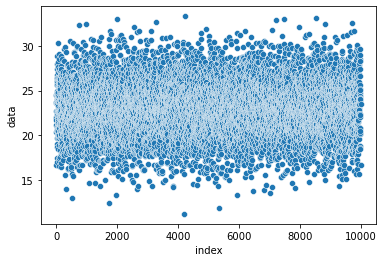

In [30]:
import seaborn as sns
sns.scatterplot(x = 'index', y = 'data', data = df)

There are 9999 datapoints that are uniformly distributed. Looking at the scatter plot, most values are between 15 and 30.

The data has a small coefficient of variance and is very, very slightly positively skewed.


## Question 4

### A. If you were asked to impute null values in a column of a file that was 365 Gigabytes, what would you do?  What tools would you use?  What tools would you NOT use?

I do not have any experience working with files of this size, but I know I would need something beyond just Python or R, and will likely need something that uses SQL. A tool like Apache Spark seems like it would be a good tool for working with such a large file. It can also be used with a variety of languages.


### B. What would you do if you were asked to do the above task every Thursday morning at 2:00am?

I would create either a BASH or Python script that would automate the task.

### Question 5 Who is your favorite mathematician, statistician or computer scientist and why?

He is not that famous, but my favorite computer scientist is Mike Pound who is a professor at Nottingham University. The reason I like him is because of the videos he has done for the YouTube channel Computerphile. His videos are always very informative but still understanable and entertaining.